# KNMI daggegevens

https://www.knmi.nl/nederland-nu/klimatologie/daggegevens

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Download databestanden van twee verschillende weerstations

In [2]:
filename1 = '../datasets/etmgeg_260.txt'    # De Bilt
filename2 = '../datasets/etmgeg_279.txt'    # Hoogeveen

In [3]:
names = 'STN,YYYYMMDD,DDVEC,FHVEC,   FG,  FHX, FHXH,  FHN, FHNH,  FXX, FXXH,   TG,   TN,  TNH,   TX,  TXH, T10N,T10NH,   SQ,   SP,    Q,   DR,   RH,  RHX, RHXH,   PG,   PX,  PXH,   PN,  PNH,  VVN, VVNH,  VVX, VVXH,   NG,   UG,   UX,  UXH,   UN,  UNH, EV24'
column_names = names.replace(' ', '').split(',')
column_names

['STN',
 'YYYYMMDD',
 'DDVEC',
 'FHVEC',
 'FG',
 'FHX',
 'FHXH',
 'FHN',
 'FHNH',
 'FXX',
 'FXXH',
 'TG',
 'TN',
 'TNH',
 'TX',
 'TXH',
 'T10N',
 'T10NH',
 'SQ',
 'SP',
 'Q',
 'DR',
 'RH',
 'RHX',
 'RHXH',
 'PG',
 'PX',
 'PXH',
 'PN',
 'PNH',
 'VVN',
 'VVNH',
 'VVX',
 'VVXH',
 'NG',
 'UG',
 'UX',
 'UXH',
 'UN',
 'UNH',
 'EV24']

In [4]:
df1 = pd.read_csv(filename1, skiprows=49, header=None, names=column_names, dtype=str)
df2 = pd.read_csv(filename2, skiprows=49, header=None, names=column_names, dtype=str)

print(df1.shape)
print(df2.shape)

converted = False

(43952, 41)
(11810, 41)


In [6]:
year = 2020
columns_of_interest = ['STN','YYYYMMDD','TG','TN','TX']

In [8]:
df1_selection = df1.loc[df1['YYYYMMDD'].str.startswith(str(year)), columns_of_interest]
df2_selection = df2.loc[df2['YYYYMMDD'].str.startswith(str(year)), columns_of_interest]

df = pd.concat([df1_selection, df2_selection]).reset_index(drop=True)

df

,STN,YYYYMMDD,TG,TN,TX
0,260,20200101,8,-2,18
1,260,20200102,39,13,74
2,260,20200103,76,43,99
3,260,20200104,67,40,81
4,260,20200105,69,59,76
...,...,...,...,...,...
727,279,20201227,44,34,53
728,279,20201228,35,14,58
729,279,20201229,32,23,42
730,279,20201230,31,12,58


In [9]:
df[['GEMIDDELDE','MINIMUM','MAXIMUM']] = df[['TG','TN','TX']].astype('int') / 10

In [10]:
df['DATUM'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')

In [11]:
stations = {
    260: 'De Bilt',
    279: 'Hoogeveen'
}

df['STATION'] = df['STN'].astype('int').map(stations)

In [12]:
df = df[['DATUM','STATION','GEMIDDELDE','MINIMUM','MAXIMUM']]

In [13]:
df_unstacked = df.set_index(['DATUM','STATION']).unstack()
df_unstacked

GEMIDDELDE           MINIMUM           MAXIMUM          
STATION       De Bilt Hoogeveen De Bilt Hoogeveen De Bilt Hoogeveen
DATUM                                                              
2020-01-01        0.8       0.2    -0.2      -0.7     1.8       1.8
2020-01-02        3.9       1.8     1.3      -0.8     7.4       6.0
2020-01-03        7.6       6.7     4.3       3.3     9.9       9.1
2020-01-04        6.7       5.3     4.0       1.8     8.1       8.1
2020-01-05        6.9       5.4     5.9       1.2     7.6       7.0
...               ...       ...     ...       ...     ...       ...
2020-12-27        5.0       4.4     3.2       3.4     5.9       5.3
2020-12-28        3.6       3.5     1.3       1.4     5.4       5.8
2020-12-29        3.7       3.2     2.5       2.3     5.8       4.2
2020-12-30        4.2       3.1     2.4       1.2     6.8       5.8
2020-12-31        2.1       1.9    -2.1      -1.6     4.0       3.8

[366 rows x 6 columns]

# Visualisatie

<AxesSubplot:xlabel='DATUM'>

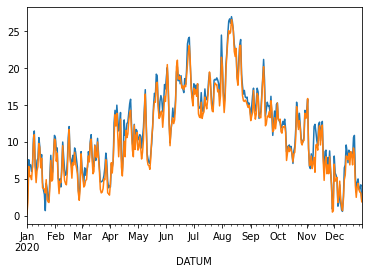

In [14]:
df_unstacked[('GEMIDDELDE', 'De Bilt')].plot()
df_unstacked[('GEMIDDELDE', 'Hoogeveen')].plot()

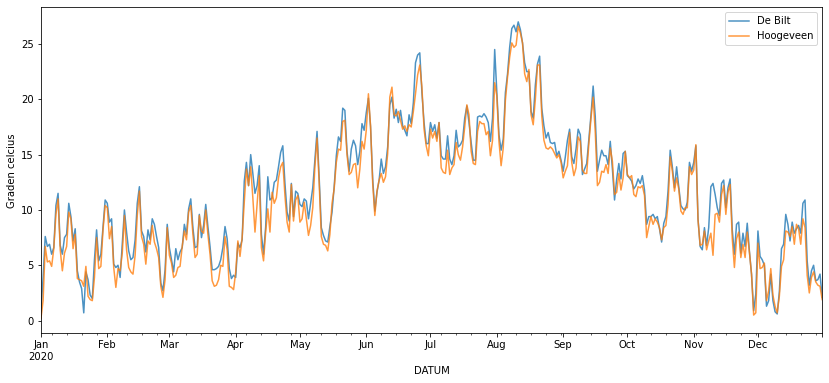

In [15]:
plt.figure(figsize=(14, 6))
df_unstacked[('GEMIDDELDE', 'De Bilt')].plot(alpha=0.8)
df_unstacked[('GEMIDDELDE', 'Hoogeveen')].plot(alpha=0.8)
plt.ylabel('Graden celcius')
plt.legend(['De Bilt', 'Hoogeveen'])
plt.show()

In [16]:
df_unstacked.describe()

GEMIDDELDE                 MINIMUM                 MAXIMUM  \
STATION     De Bilt   Hoogeveen     De Bilt   Hoogeveen     De Bilt   
count    366.000000  366.000000  366.000000  366.000000  366.000000   
mean      11.688251   10.928142    7.133880    6.315574   15.810383   
std        5.567863    5.529339    5.108376    4.877918    6.816009   
min        0.600000    0.200000   -4.300000   -4.400000    1.800000   
25%        7.300000    6.700000    3.500000    2.325000   10.325000   
50%       11.500000   10.450000    7.000000    6.150000   15.000000   
75%       15.700000   14.775000   10.675000    9.800000   20.975000   
max       27.000000   26.600000   21.500000   19.100000   34.600000   

                     
STATION   Hoogeveen  
count    366.000000  
mean      15.309016  
std        6.909787  
min        1.400000  
25%        9.925000  
50%       14.350000  
75%       20.375000  
max       34.300000

<AxesSubplot:>

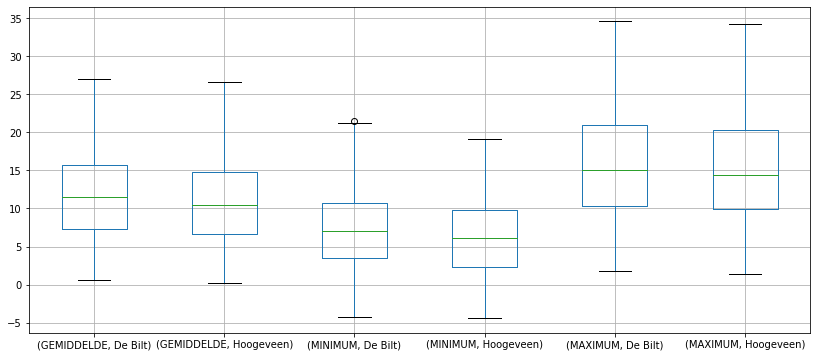

In [17]:
df_unstacked.boxplot(figsize=(14, 6))

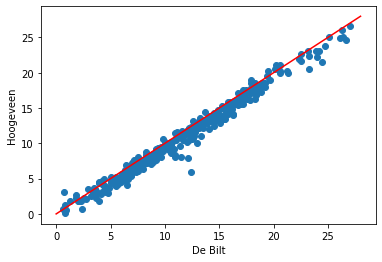

In [18]:
plt.scatter(df_unstacked[('GEMIDDELDE','De Bilt')], 
            df_unstacked[('GEMIDDELDE','Hoogeveen')])
plt.plot([0, 28], [0, 28], color='r')
plt.xlabel('De Bilt')
plt.ylabel('Hoogeveen')
plt.show()


#### Temperatuurverschil

In [19]:
diff = df_unstacked[('GEMIDDELDE','Hoogeveen')] - df_unstacked[('GEMIDDELDE','De Bilt')]
diff

DATUM
2020-01-01   -0.6
2020-01-02   -2.1
2020-01-03   -0.9
2020-01-04   -1.4
2020-01-05   -1.5
             ... 
2020-12-27   -0.6
2020-12-28   -0.1
2020-12-29   -0.5
2020-12-30   -1.1
2020-12-31   -0.2
Length: 366, dtype: float64

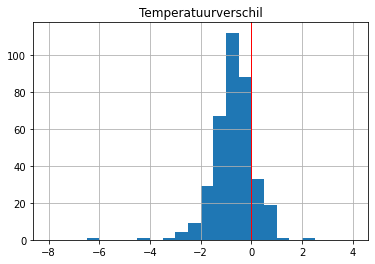

In [20]:
bins = np.arange(-8, 4.5, 0.5)
diff.hist(bins=bins)
plt.axvline(0, color='red', linewidth=1)
plt.title('Temperatuurverschil')
plt.show()

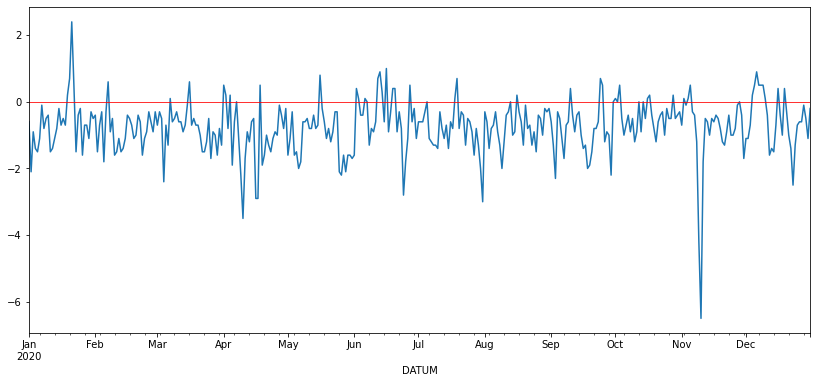

In [21]:
plt.figure(figsize=(14, 6))
diff.plot()
plt.axhline(0, color='red', linewidth=1, alpha=0.8)
plt.show()


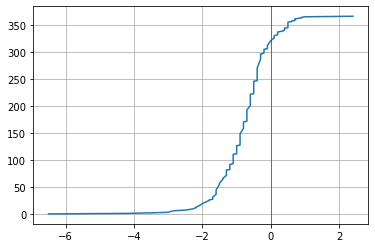

In [22]:
n = diff.groupby(diff).count()

cum_diff = n.cumsum()
cum_diff.plot()
plt.axvline(0, color='red', linewidth=1.0, alpha=0.7)
plt.grid()

In [23]:
n_kouder = np.sum(diff<0)
n_totaal, _ = df_unstacked.shape

print('Op %d van de %d dagen (%.0f%%) is het kouder in %s dan in %s' % (n_kouder, 
                                                                        n_totaal, 
                                                                        100*n_kouder/n_totaal, 
                                                                        'Hoogeveen', 
                                                                        'De Bilt'))

Op 312 van de 366 dagen (85%) is het kouder in Hoogeveen dan in De Bilt


## Student t-test

In [24]:
from scipy import stats
t, p = stats.ttest_1samp(diff, 0)
print("The t-statistic is %.3f and the p-value is %.5f." % (t, p/2))

The t-statistic is -18.156 and the p-value is 0.00000.


## Global Warming in Nederland

In [25]:
data = pd.read_csv(filename1, skiprows=49, header=None, names=column_names, dtype=str)

In [26]:
df = data[['YYYYMMDD','TG']].astype(np.int32)
df[['GEMIDDELDE']] = df[['TG']] / 10
df['DATUM'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')
df.set_index('DATUM', inplace=True)
df = df.truncate(before='1900-01-01', after='2020-12-31')[['GEMIDDELDE']]
df

,GEMIDDELDE
DATUM,
1901-01-01,-4.9
1901-01-02,-1.8
1901-01-03,-2.6
1901-01-04,-6.5
1901-01-05,-6.0
...,...
2020-12-27,5.0
2020-12-28,3.6
2020-12-29,3.7


In [27]:
weekly = df.resample('W').mean()
monthly = df.resample('M').mean()
yearly = df.resample('Y').mean()

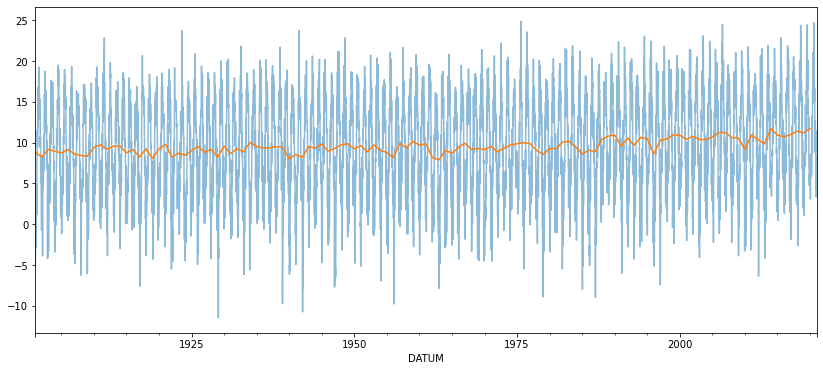

In [28]:
plt.figure(figsize=(14, 6))
weekly['GEMIDDELDE'].plot(alpha=0.5)
yearly['GEMIDDELDE'].plot()
plt.show()

In [29]:
coefs = np.polyfit(yearly.index.year, yearly['GEMIDDELDE'], 5)
model = np.poly1d(coefs)

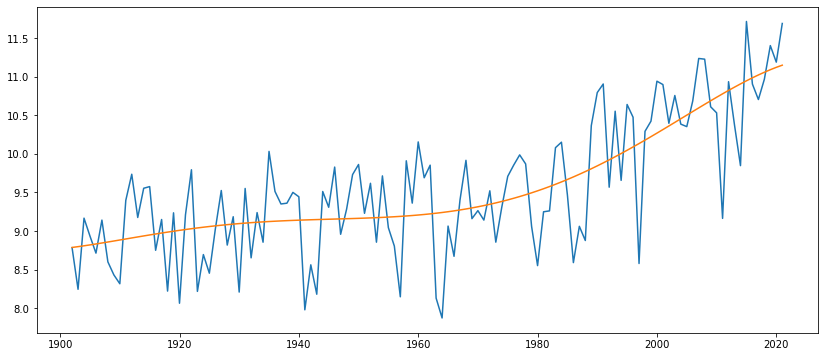

In [28]:
plt.figure(figsize=(14, 6))
plt.plot(yearly['GEMIDDELDE'])
plt.plot(yearly.index, model(yearly.index.year))
plt.show()